In [121]:
import numpy as np
from joblib import load
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

In [122]:
class MyMinMax:
    def __init__(self, axis):
        self.sc = MinMaxScaler()
        self.axis = axis

    def fit(self, X):
        if self.axis==1:
            self.sc = self.sc.fit(X.transpose())
        elif self.axis==0:
            self.sc = self.sc.fit(X)
        return self.sc

    def transform(self, X):
        if self.axis==1:
            Xn = self.sc.transform(X.transpose()).transpose()
        elif self.axis==0:
            Xn = self.sc.transform(X)
        return Xn

    def fit_transform(self, X):
        if self.axis==1:
            self.sc = self.sc.fit(X.transpose())
            Xn = self.sc.transform(X.transpose()).transpose()
        elif self.axis==0:
            self.sc = self.sc.fit(X)
            Xn = self.sc.transform(X)
        return Xn

In [136]:
sc_train = load('./Final_Results/FS/sc_train_regminmax.joblib')
sc_train_corr = load('./Final_Results/FS/sc_train_corr_regminmax.joblib')
sc_train_corr_l = load('./Final_Results/FS/sc_train_corr_l_regminmax.joblib')
sc_train_corr_r = load('./Final_Results/FS/sc_train_corr_r_regminmax.joblib')

df_corr = pd.read_csv('./Final_Results/CORR_ANA/fullbrain_corr.csv', index_col=0)
df_corr_l = pd.read_csv('./Final_Results/CORR_ANA/leftbrain_corr.csv', index_col=0)
df_corr_r = pd.read_csv('./Final_Results/CORR_ANA/rightbrain_corr.csv', index_col=0)


# Load test dataset
df_test = pd.read_csv('./Final_Results/INITIAL_SPLIT/test_fullbrain.csv', index_col=0)
df_test_corr = df_test.loc[:, df_corr.columns]
df_test_corr_l = df_test.loc[:, df_corr_l.columns]
df_test_corr_r = df_test.loc[:, df_corr_r.columns]

print(df_test.shape)
print(df_test['labels'].value_counts())

XN = sc_train.transform(df_test.drop('labels', axis=1))
XN_corr = sc_train_corr.transform(df_test_corr.drop('labels', axis=1))
XN_corr_l = sc_train_corr_l.transform(df_test_corr_l.drop('labels', axis=1))
XN_corr_r = sc_train_corr_r.transform(df_test_corr_r.drop('labels', axis=1))



(67, 545)
0    36
1    31
Name: labels, dtype: int64


## Goal of this notebook:
For each normalization method:<br>
$\;\;\;\;\;$ For each RFE classifier core:<br>
$\;\;\;\;\;$ $\;\;\;\;\;$ For each data matrix (corr; uncorr; ucorrleft; ucorrright):<br>
$\;\;\;\;\;$ $\;\;\;\;\;$ $\;\;\;\;\;$ 1. Find the classifier with highest performance <br>
$\;\;\;\;\;$ $\;\;\;\;\;$ $\;\;\;\;\;$ 2. Use this classifier to train on all the training set<br>
$\;\;\;\;\;$ $\;\;\;\;\;$ $\;\;\;\;\;$ 3. Measure the performance on the testing set<br><br>

Measure the performance in the testing set:
1. Load the testing set
2. Get the normalization object corresponding to the current normalization method
3. Normalize the testing set using the normalization object of the training set
4. Load the rfe+(RFE classifier core)
5. Get the selected features used for learning the best ML model
6. Select those features out of the normalized testing set
7. Predict the labels of the output matrix from step 6



### Logistic regression l1-norm

In [124]:
clf = load('./Final_Results/ML/minmaxreg/clf_lg1_train.joblib')
clf_corr = load('./Final_Results/ML/minmaxreg/clf_lg1_train_corr.joblib')
clf_corr_l = load('./Final_Results/ML/minmaxreg/clf_lg1_train_corr_l.joblib')
clf_corr_r = load('./Final_Results/ML/minmaxreg/clf_lg1_train_corr_r.joblib')

In [125]:
print("clf_lg1_train")
print(clf['lSVM'].best_score_)
print(clf['pagg'].best_score_)
print(clf['lg'].best_score_)
print(clf['XGB'].best_score_)
print(clf['GNB'].best_score_)
print(clf['SVC'].best_score_)
print(clf['Rf'].best_score_)
print(clf['nn'].best_score_)
print("0000000000000000000000000000000000000000000")
print("clf_lg1_train_corr")
print(clf_corr['lSVM'].best_score_)
print(clf_corr['pagg'].best_score_)
print(clf_corr['lg'].best_score_)
print(clf_corr['XGB'].best_score_)
print(clf_corr['GNB'].best_score_)
print(clf_corr['SVC'].best_score_)
print(clf_corr['Rf'].best_score_)
print(clf_corr['nn'].best_score_)
print("0000000000000000000000000000000000000000000")
print("clf_lg1_train_corr_l")
print(clf_corr_l['lSVM'].best_score_)
print(clf_corr_l['pagg'].best_score_)
print(clf_corr_l['lg'].best_score_)
print(clf_corr_l['XGB'].best_score_)
print(clf_corr_l['GNB'].best_score_)
print(clf_corr_l['SVC'].best_score_)
print(clf_corr_l['Rf'].best_score_)
print(clf_corr_l['nn'].best_score_)
print("0000000000000000000000000000000000000000000")
print("clf_lg1_train_corr_r")
print(clf_corr_r['lSVM'].best_score_)
print(clf_corr_r['pagg'].best_score_)
print(clf_corr_r['lg'].best_score_)
print(clf_corr_r['XGB'].best_score_)
print(clf_corr_r['GNB'].best_score_)
print(clf_corr_r['SVC'].best_score_)
print(clf_corr_r['Rf'].best_score_)
print(clf_corr_r['nn'].best_score_)

clf_lg1_train
0.5944350282485876
0.6031638418079096
0.5961016949152542
0.6155367231638418
0.5838135593220339
0.6042937853107345
0.5974576271186441
0.6247457627118644
0000000000000000000000000000000000000000000
clf_lg1_train_corr
0.6699717514124294
0.6412994350282486
0.6648587570621469
0.663276836158192
0.600677966101695
0.6766101694915253
0.6380508474576271
0.6832485875706215
0000000000000000000000000000000000000000000
clf_lg1_train_corr_l
0.621412429378531
0.6178813559322034
0.6213559322033897
0.6329378531073446
0.6075706214689266
0.6394915254237288
0.6297457627118644
0.6396610169491526
0000000000000000000000000000000000000000000
clf_lg1_train_corr_r
0.6315536723163842
0.5911864406779661
0.6314689265536724
0.6165254237288136
0.5941807909604521
0.6366666666666666
0.6363276836158193
0.6518361581920904


Based on the current results, I am going to proceed with "lg1_train_corr", classifier XGB

In [128]:
selected_clc1 = clf['XGB'].best_estimator_
selected_clc2 = clf['nn'].best_estimator_

selected_clc3 = clf_corr['lSVM'].best_estimator_
selected_clc4 = clf_corr['lg'].best_estimator_
selected_clc5 = clf_corr['XGB'].best_estimator_
selected_clc6 = clf_corr['SVC'].best_estimator_
selected_clc7 = clf_corr['Rf'].best_estimator_
selected_clc8 = clf_corr['nn'].best_estimator_

selected_clc9 = clf_corr_l['SVC'].best_estimator_
selected_clc10 = clf_corr_l['nn'].best_estimator_

selected_clc11 = clf_corr_r['lSVM'].best_estimator_
selected_clc12 = clf_corr_r['lg'].best_estimator_
selected_clc13 = clf_corr_r['SVC'].best_estimator_
selected_clc14 = clf_corr_r['Rf'].best_estimator_
selected_clc15 = clf_corr_r['nn'].best_estimator_

print(f'selected classifier 1: XGB_alldata with accuracy {clf["XGB"].best_score_}')
print(f'selected classifier 2: nn_alldata with accuracy {clf["nn"].best_score_}')

print(f'selected classifier 3: lSVM_corr with accuracy {clf_corr["lSVM"].best_score_}')
print(f'selected classifier 4: lSVM_alldata with accuracy {clf_corr["lg"].best_score_}')
print(f'selected classifier 5: SVC_alldata with accuracy {clf_corr["XGB"].best_score_}')
print(f'selected classifier 6: lSVM_corr with accuracy {clf_corr["SVC"].best_score_}')
print(f'selected classifier 7: lSVM_alldata with accuracy {clf_corr["Rf"].best_score_}')
print(f'selected classifier 8: SVC_alldata with accuracy {clf_corr["nn"].best_score_}')

print(f'selected classifier 9: lSVM_alldata with accuracy {clf_corr_l["SVC"].best_score_}')
print(f'selected classifier 10: SVC_alldata with accuracy {clf_corr_l["nn"].best_score_}')

print(f'selected classifier 11: lSVM_corr with accuracy {clf_corr_r["lSVM"].best_score_}')
print(f'selected classifier 12: lSVM_alldata with accuracy {clf_corr_r["lg"].best_score_}')
print(f'selected classifier 13: SVC_alldata with accuracy {clf_corr_r["SVC"].best_score_}')
print(f'selected classifier 14: lSVM_corr with accuracy {clf_corr_r["Rf"].best_score_}')
print(f'selected classifier 15: lSVM_alldata with accuracy {clf_corr_r["nn"].best_score_}')


selected classifier 1: XGB_alldata with accuracy 0.6155367231638418
selected classifier 2: nn_alldata with accuracy 0.6247457627118644
selected classifier 3: lSVM_corr with accuracy 0.6699717514124294
selected classifier 4: lSVM_alldata with accuracy 0.6648587570621469
selected classifier 5: SVC_alldata with accuracy 0.663276836158192
selected classifier 6: lSVM_corr with accuracy 0.6766101694915253
selected classifier 7: lSVM_alldata with accuracy 0.6380508474576271
selected classifier 8: SVC_alldata with accuracy 0.6832485875706215
selected classifier 9: lSVM_alldata with accuracy 0.6394915254237288
selected classifier 10: SVC_alldata with accuracy 0.6396610169491526
selected classifier 11: lSVM_corr with accuracy 0.6315536723163842
selected classifier 12: lSVM_alldata with accuracy 0.6314689265536724
selected classifier 13: SVC_alldata with accuracy 0.6366666666666666
selected classifier 14: lSVM_corr with accuracy 0.6363276836158193
selected classifier 15: lSVM_alldata with accurac

In [155]:
# Load the corresponding rfe object
#clc1 & 2
selected_rfe12 = load('./Final_Results/FS/Regular_minMaxNorm/rfetrain_lg1.joblib')
Xtest12 = XN[:, np.where(selected_rfe12.support_)[0]]

# clc3-8
selected_rfe38 = load('./Final_Results/FS/Regular_minMaxNorm/rfetrain_corr_lg1.joblib')
Xtest38 = XN_corr[:, np.where(selected_rfe38.support_)[0]]

#clc9-10
selected_rfe910 = load('./Final_Results/FS/Regular_minMaxNorm/rfetrain_corr_l_lg1.joblib')
Xtest910 = XN_corr_l[:, np.where(selected_rfe910.support_)[0]]

#clc11-15
selected_rfe1115 = load('./Final_Results/FS/Regular_minMaxNorm/rfetrain_corr_r_lg1.joblib')
Xtest1115 = XN_corr_r[:, np.where(selected_rfe1115.support_)[0]]

In [156]:
# Load training dataset to train the current model using all training set
Xtrain = np.load('./Final_Results/FS/Regular_minMaxNorm/Xtrain_lg1.npy')
Xtrain_corr = np.load('./Final_Results/FS/Regular_minMaxNorm/Xtrain_corr_lg1.npy')
Xtrain_corr_l = np.load('./Final_Results/FS/Regular_minMaxNorm/Xtrain_corr_l_lg1.npy')
Xtrain_corr_r = np.load('./Final_Results/FS/Regular_minMaxNorm/Xtrain_corr_r_lg1.npy')

ytrain = np.load('./Final_Results/FS/Regular_minMaxNorm/ytrain_corr.npy')
Xtrain.shape, ytrain.shape

((597, 2), (597,))

In [157]:
# clc1
print(classification_report(df_test['labels'].values, selected_clc1.predict(Xtest12)))

              precision    recall  f1-score   support

           0       0.51      0.56      0.53        36
           1       0.43      0.39      0.41        31

    accuracy                           0.48        67
   macro avg       0.47      0.47      0.47        67
weighted avg       0.47      0.48      0.47        67



In [158]:
# clc2
print(classification_report(df_test['labels'].values, selected_clc2.predict(Xtest12)))

              precision    recall  f1-score   support

           0       0.61      0.61      0.61        36
           1       0.55      0.55      0.55        31

    accuracy                           0.58        67
   macro avg       0.58      0.58      0.58        67
weighted avg       0.58      0.58      0.58        67



In [159]:
# clc3
print(classification_report(df_test['labels'].values, selected_clc3.predict(Xtest38)))

              precision    recall  f1-score   support

           0       0.54      0.53      0.54        36
           1       0.47      0.48      0.48        31

    accuracy                           0.51        67
   macro avg       0.51      0.51      0.51        67
weighted avg       0.51      0.51      0.51        67



In [160]:
# clc4
print(classification_report(df_test['labels'].values, selected_clc4.predict(Xtest38)))

              precision    recall  f1-score   support

           0       0.58      0.53      0.55        36
           1       0.50      0.55      0.52        31

    accuracy                           0.54        67
   macro avg       0.54      0.54      0.54        67
weighted avg       0.54      0.54      0.54        67



In [161]:
# clc5
print(classification_report(df_test['labels'].values, selected_clc5.predict(Xtest38)))

              precision    recall  f1-score   support

           0       0.53      0.53      0.53        36
           1       0.45      0.45      0.45        31

    accuracy                           0.49        67
   macro avg       0.49      0.49      0.49        67
weighted avg       0.49      0.49      0.49        67



In [162]:
# clc6
print(classification_report(df_test['labels'].values, selected_clc6.predict(Xtest38)))

              precision    recall  f1-score   support

           0       0.56      0.53      0.54        36
           1       0.48      0.52      0.50        31

    accuracy                           0.52        67
   macro avg       0.52      0.52      0.52        67
weighted avg       0.52      0.52      0.52        67



In [163]:
# clc7
print(classification_report(df_test['labels'].values, selected_clc7.predict(Xtest38)))

              precision    recall  f1-score   support

           0       0.59      0.61      0.60        36
           1       0.53      0.52      0.52        31

    accuracy                           0.57        67
   macro avg       0.56      0.56      0.56        67
weighted avg       0.57      0.57      0.57        67



In [164]:
# clc8
print(classification_report(df_test['labels'].values, selected_clc8.predict(Xtest38)))

              precision    recall  f1-score   support

           0       0.56      0.53      0.54        36
           1       0.48      0.52      0.50        31

    accuracy                           0.52        67
   macro avg       0.52      0.52      0.52        67
weighted avg       0.52      0.52      0.52        67



In [165]:
# clc9
print(classification_report(df_test['labels'].values, selected_clc9.predict(Xtest910)))

              precision    recall  f1-score   support

           0       0.64      0.69      0.67        36
           1       0.61      0.55      0.58        31

    accuracy                           0.63        67
   macro avg       0.62      0.62      0.62        67
weighted avg       0.63      0.63      0.62        67



In [166]:
# clc10
print(classification_report(df_test['labels'].values, selected_clc10.predict(Xtest910)))

              precision    recall  f1-score   support

           0       0.60      0.72      0.66        36
           1       0.58      0.45      0.51        31

    accuracy                           0.60        67
   macro avg       0.59      0.59      0.58        67
weighted avg       0.59      0.60      0.59        67



In [167]:
# clc11
print(classification_report(df_test['labels'].values, selected_clc11.predict(Xtest1115)))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62        36
           1       0.56      0.58      0.57        31

    accuracy                           0.60        67
   macro avg       0.60      0.60      0.60        67
weighted avg       0.60      0.60      0.60        67



In [168]:
# clc12
print(classification_report(df_test['labels'].values, selected_clc12.predict(Xtest1115)))

              precision    recall  f1-score   support

           0       0.62      0.58      0.60        36
           1       0.55      0.58      0.56        31

    accuracy                           0.58        67
   macro avg       0.58      0.58      0.58        67
weighted avg       0.58      0.58      0.58        67



In [169]:
# clc13
print(classification_report(df_test['labels'].values, selected_clc13.predict(Xtest1115)))

              precision    recall  f1-score   support

           0       0.59      0.47      0.52        36
           1       0.50      0.61      0.55        31

    accuracy                           0.54        67
   macro avg       0.54      0.54      0.54        67
weighted avg       0.55      0.54      0.54        67



In [170]:
# clc14
print(classification_report(df_test['labels'].values, selected_clc14.predict(Xtest1115)))

              precision    recall  f1-score   support

           0       0.64      0.58      0.61        36
           1       0.56      0.61      0.58        31

    accuracy                           0.60        67
   macro avg       0.60      0.60      0.60        67
weighted avg       0.60      0.60      0.60        67



In [171]:
# clc15
print(classification_report(df_test['labels'].values, selected_clc15.predict(Xtest1115)))

              precision    recall  f1-score   support

           0       0.61      0.53      0.57        36
           1       0.53      0.61      0.57        31

    accuracy                           0.57        67
   macro avg       0.57      0.57      0.57        67
weighted avg       0.57      0.57      0.57        67



### Logistic regression l2-norm

In [189]:
clf = load('./Final_Results/ML/minmaxreg//clf_lg2_train.joblib')
clf_corr = load('./Final_Results/ML/minmaxreg/clf_lg2_train_corr.joblib')
clf_corr_l = load('./Final_Results/ML/minmaxreg/clf_lg2_train_corr_l.joblib')
clf_corr_r = load('./Final_Results/ML/minmaxreg/clf_lg2_train_corr_r.joblib')

In [190]:
print("clf_lg2_train")
print(clf['lSVM'].best_score_)
print(clf['pagg'].best_score_)
print(clf['lg'].best_score_)
print(clf['XGB'].best_score_)
print(clf['GNB'].best_score_)
print(clf['SVC'].best_score_)
print(clf['Rf'].best_score_)
print(clf['nn'].best_score_)
print("0000000000000000000000000000000000000000000")
print("clf_lg2_train_corr")
print(clf_corr['lSVM'].best_score_)
print(clf_corr['pagg'].best_score_)
print(clf_corr['lg'].best_score_)
print(clf_corr['XGB'].best_score_)
print(clf_corr['GNB'].best_score_)
print(clf_corr['SVC'].best_score_)
print(clf_corr['Rf'].best_score_)
print(clf_corr['nn'].best_score_)
print("0000000000000000000000000000000000000000000")
print("clf_lg2_train_corr_l")
print(clf_corr_l['lSVM'].best_score_)
print(clf_corr_l['pagg'].best_score_)
print(clf_corr_l['lg'].best_score_)
print(clf_corr_l['XGB'].best_score_)
print(clf_corr_l['GNB'].best_score_)
print(clf_corr_l['SVC'].best_score_)
print(clf_corr_l['Rf'].best_score_)
print(clf_corr_l['nn'].best_score_)
print("0000000000000000000000000000000000000000000")
print("clf_lg2_train_corr_r")
print(clf_corr_r['lSVM'].best_score_)
print(clf_corr_r['pagg'].best_score_)
print(clf_corr_r['lg'].best_score_)
print(clf_corr_r['XGB'].best_score_)
print(clf_corr_r['GNB'].best_score_)
print(clf_corr_r['SVC'].best_score_)
print(clf_corr_r['Rf'].best_score_)
print(clf_corr_r['nn'].best_score_)

clf_lg2_train
0.6849435028248587
0.662909604519774
0.6883898305084746
0.6834180790960451
0.602457627118644
0.6900847457627118
0.6330508474576272
0.6951694915254236
0000000000000000000000000000000000000000000
clf_lg2_train_corr
0.6515536723163842
0.6471186440677965
0.6515819209039548
0.6581638418079095
0.604180790960452
0.669915254237288
0.6177401129943503
0.6632768361581921
0000000000000000000000000000000000000000000
clf_lg2_train_corr_l
0.6429661016949153
0.6079661016949153
0.6346610169491524
0.6416101694915254
0.6039830508474576
0.6733050847457627
0.6194915254237288
0.6515819209039547
0000000000000000000000000000000000000000000
clf_lg2_train_corr_r
0.6282485875706214
0.5931920903954803
0.6332485875706215
0.6181920903954803
0.5838418079096044
0.64
0.6346610169491524
0.6448870056497176


In [191]:
selected_clc1 = clf['lSVM'].best_estimator_
selected_clc2 = clf['lg'].best_estimator_
selected_clc3 = clf['SVC'].best_estimator_
selected_clc4 = clf['nn'].best_estimator_

selected_clc5 = clf_corr['lSVM'].best_estimator_
selected_clc6 = clf_corr['lg'].best_estimator_
selected_clc7 = clf_corr['XGB'].best_estimator_
selected_clc8 = clf_corr['SVC'].best_estimator_
selected_clc9 = clf_corr['nn'].best_estimator_

selected_clc10 = clf_corr_l['lSVM'].best_estimator_
selected_clc11 = clf_corr_l['XGB'].best_estimator_
selected_clc12 = clf_corr_l['SVC'].best_estimator_
selected_clc13 = clf_corr_l['nn'].best_estimator_

selected_clc14 = clf_corr_r['lSVM'].best_estimator_
selected_clc15 = clf_corr_r['lg'].best_estimator_
selected_clc16 = clf_corr_r['SVC'].best_estimator_
selected_clc17 = clf_corr_r['Rf'].best_estimator_
selected_clc18 = clf_corr_r['nn'].best_estimator_

print(f'selected classifier 1: lSVM_alldata with accuracy {clf["lSVM"].best_score_}')
print(f'selected classifier 2: lg_alldata with accuracy {clf["lg"].best_score_}')
print(f'selected classifier 3: SVC_alldata with accuracy {clf["SVC"].best_score_}')
print(f'selected classifier 4: nn_alldata with accuracy {clf["nn"].best_score_}')

print(f'selected classifier 5: lSVM_corr with accuracy {clf_corr["lSVM"].best_score_}')
print(f'selected classifier 6: lg_corr with accuracy {clf_corr["lg"].best_score_}')
print(f'selected classifier 7: XGB_corr with accuracy {clf_corr["XGB"].best_score_}')
print(f'selected classifier 8: SVC_corr with accuracy {clf_corr["SVC"].best_score_}')
print(f'selected classifier 9: nn_corr with accuracy {clf_corr["nn"].best_score_}')

print(f'selected classifier 10: lSVM_corr_l with accuracy {clf_corr_l["lSVM"].best_score_}')
print(f'selected classifier 11: XGB_corr_l with accuracy {clf_corr_l["XGB"].best_score_}')
print(f'selected classifier 12: SVC_corr_l with accuracy {clf_corr_l["SVC"].best_score_}')
print(f'selected classifier 13: nn_corr_l with accuracy {clf_corr_l["nn"].best_score_}')

print(f'selected classifier 14: lSVM_corr_r with accuracy {clf_corr_r["lSVM"].best_score_}')
print(f'selected classifier 15: lg_corr_r with accuracy {clf_corr_r["lg"].best_score_}')
print(f'selected classifier 16: SVC_corr_r with accuracy {clf_corr_r["SVC"].best_score_}')
print(f'selected classifier 17: Rf_corr_r with accuracy {clf_corr_r["Rf"].best_score_}')
print(f'selected classifier 18: nn_corr_r with accuracy {clf_corr_r["nn"].best_score_}')


selected classifier 1: lSVM_alldata with accuracy 0.6849435028248587
selected classifier 2: lg_alldata with accuracy 0.6883898305084746
selected classifier 3: SVC_alldata with accuracy 0.6900847457627118
selected classifier 4: nn_alldata with accuracy 0.6951694915254236
selected classifier 5: lSVM_corr with accuracy 0.6515536723163842
selected classifier 6: lg_corr with accuracy 0.6515819209039548
selected classifier 7: XGB_corr with accuracy 0.6581638418079095
selected classifier 8: SVC_corr with accuracy 0.669915254237288
selected classifier 9: nn_corr with accuracy 0.6632768361581921
selected classifier 10: lSVM_corr_l with accuracy 0.6429661016949153
selected classifier 11: XGB_corr_l with accuracy 0.6416101694915254
selected classifier 12: SVC_corr_l with accuracy 0.6733050847457627
selected classifier 13: nn_corr_l with accuracy 0.6515819209039547
selected classifier 14: lSVM_corr_r with accuracy 0.6282485875706214
selected classifier 15: lg_corr_r with accuracy 0.633248587570621

In [223]:

# Load the corresponding rfe object
#clc14
selected_rfe14 = load('./Final_Results/FS/Regular_minMaxNorm/rfetrain_lg2.joblib')
Xtest14 = XN[:, np.where(selected_rfe14.support_)[0]]

# clc59
selected_rfe59 = load('./Final_Results/FS/Regular_minMaxNorm/rfetrain_corr_lg2.joblib')
Xtest59 = XN_corr[:, np.where(selected_rfe59.support_)[0]]

# clc1013
selected_rfe1013 = load('./Final_Results/FS/Regular_minMaxNorm/rfetrain_corr_l_lg2.joblib')
Xtest1013 = XN_corr_l[:, np.where(selected_rfe1013.support_)[0]]

# clc1418
selected_rfe1418 = load('./Final_Results/FS/Regular_minMaxNorm/rfetrain_corr_r_lg2.joblib')
Xtest1418 = XN_corr_r[:, np.where(selected_rfe1418.support_)[0]]

In [224]:
# Load training dataset to train the current model using all training set
# clc1&2
Xtrain14 = np.load('./Final_Results/FS/Regular_minMaxNorm/Xtrain_lg2.npy')

# clc3
Xtrain59 = np.load('./Final_Results/FS/Regular_minMaxNorm/Xtrain_corr_lg2.npy')


# clc4
Xtrain1013 = np.load('./Final_Results/FS/Regular_minMaxNorm/Xtrain_corr_l_lg2.npy')

# clc5
Xtrain1418 = np.load('./Final_Results/FS/Regular_minMaxNorm/Xtrain_corr_r_lg2.npy')


ytrain = np.load('./Final_Results/FS/Regular_minMaxNorm/ytrain_corr.npy')


In [225]:
# clc1
print(classification_report(df_test['labels'].values, selected_clc1.predict(Xtest14)))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62        36
           1       0.56      0.58      0.57        31

    accuracy                           0.60        67
   macro avg       0.60      0.60      0.60        67
weighted avg       0.60      0.60      0.60        67



In [226]:
# clc2
print(classification_report(df_test['labels'].values, selected_clc2.predict(Xtest14)))

              precision    recall  f1-score   support

           0       0.59      0.61      0.60        36
           1       0.53      0.52      0.52        31

    accuracy                           0.57        67
   macro avg       0.56      0.56      0.56        67
weighted avg       0.57      0.57      0.57        67



In [227]:
# clc3
print(classification_report(df_test['labels'].values, selected_clc3.predict(Xtest14)))

              precision    recall  f1-score   support

           0       0.62      0.64      0.63        36
           1       0.57      0.55      0.56        31

    accuracy                           0.60        67
   macro avg       0.59      0.59      0.59        67
weighted avg       0.60      0.60      0.60        67



In [228]:
# clc4
print(classification_report(df_test['labels'].values, selected_clc4.predict(Xtest14)))

              precision    recall  f1-score   support

           0       0.61      0.61      0.61        36
           1       0.55      0.55      0.55        31

    accuracy                           0.58        67
   macro avg       0.58      0.58      0.58        67
weighted avg       0.58      0.58      0.58        67



In [229]:
# clc5
print(classification_report(df_test['labels'].values, selected_clc5.predict(Xtest59)))

              precision    recall  f1-score   support

           0       0.60      0.58      0.59        36
           1       0.53      0.55      0.54        31

    accuracy                           0.57        67
   macro avg       0.57      0.57      0.57        67
weighted avg       0.57      0.57      0.57        67



In [230]:
# clc6
print(classification_report(df_test['labels'].values, selected_clc6.predict(Xtest59)))

              precision    recall  f1-score   support

           0       0.62      0.58      0.60        36
           1       0.55      0.58      0.56        31

    accuracy                           0.58        67
   macro avg       0.58      0.58      0.58        67
weighted avg       0.58      0.58      0.58        67



In [231]:
# clc7
print(classification_report(df_test['labels'].values, selected_clc7.predict(Xtest59)))

              precision    recall  f1-score   support

           0       0.62      0.64      0.63        36
           1       0.57      0.55      0.56        31

    accuracy                           0.60        67
   macro avg       0.59      0.59      0.59        67
weighted avg       0.60      0.60      0.60        67



In [232]:
# clc8
print(classification_report(df_test['labels'].values, selected_clc8.predict(Xtest59)))

              precision    recall  f1-score   support

           0       0.61      0.53      0.57        36
           1       0.53      0.61      0.57        31

    accuracy                           0.57        67
   macro avg       0.57      0.57      0.57        67
weighted avg       0.57      0.57      0.57        67



In [233]:
# clc9
print(classification_report(df_test['labels'].values, selected_clc9.predict(Xtest59)))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64        36
           1       0.58      0.58      0.58        31

    accuracy                           0.61        67
   macro avg       0.61      0.61      0.61        67
weighted avg       0.61      0.61      0.61        67



In [234]:
# clc10
print(classification_report(df_test['labels'].values, selected_clc10.predict(Xtest1013)))

              precision    recall  f1-score   support

           0       0.57      0.67      0.62        36
           1       0.52      0.42      0.46        31

    accuracy                           0.55        67
   macro avg       0.55      0.54      0.54        67
weighted avg       0.55      0.55      0.55        67



In [235]:
# clc11
print(classification_report(df_test['labels'].values, selected_clc11.predict(Xtest1013)))

              precision    recall  f1-score   support

           0       0.56      0.50      0.53        36
           1       0.49      0.55      0.52        31

    accuracy                           0.52        67
   macro avg       0.52      0.52      0.52        67
weighted avg       0.53      0.52      0.52        67



In [236]:
# clc12
print(classification_report(df_test['labels'].values, selected_clc12.predict(Xtest1013)))

              precision    recall  f1-score   support

           0       0.62      0.56      0.59        36
           1       0.54      0.61      0.58        31

    accuracy                           0.58        67
   macro avg       0.58      0.58      0.58        67
weighted avg       0.59      0.58      0.58        67



In [237]:
# clc13
print(classification_report(df_test['labels'].values, selected_clc13.predict(Xtest1013)))

              precision    recall  f1-score   support

           0       0.60      0.72      0.66        36
           1       0.58      0.45      0.51        31

    accuracy                           0.60        67
   macro avg       0.59      0.59      0.58        67
weighted avg       0.59      0.60      0.59        67



In [206]:
# clc14
print(classification_report(df_test['labels'].values, selected_clc14.predict(Xtest1418)))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64        36
           1       0.58      0.58      0.58        31

    accuracy                           0.61        67
   macro avg       0.61      0.61      0.61        67
weighted avg       0.61      0.61      0.61        67



In [207]:
# clc15
print(classification_report(df_test['labels'].values, selected_clc15.predict(Xtest1418)))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62        36
           1       0.56      0.58      0.57        31

    accuracy                           0.60        67
   macro avg       0.60      0.60      0.60        67
weighted avg       0.60      0.60      0.60        67



In [208]:
# clc16
print(classification_report(df_test['labels'].values, selected_clc16.predict(Xtest1418)))

              precision    recall  f1-score   support

           0       0.60      0.50      0.55        36
           1       0.51      0.61      0.56        31

    accuracy                           0.55        67
   macro avg       0.56      0.56      0.55        67
weighted avg       0.56      0.55      0.55        67



In [209]:
# clc17
print(classification_report(df_test['labels'].values, selected_clc17.predict(Xtest1418)))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62        36
           1       0.56      0.58      0.57        31

    accuracy                           0.60        67
   macro avg       0.60      0.60      0.60        67
weighted avg       0.60      0.60      0.60        67



In [210]:
# clc18
print(classification_report(df_test['labels'].values, selected_clc18.predict(Xtest1418)))

              precision    recall  f1-score   support

           0       0.61      0.56      0.58        36
           1       0.53      0.58      0.55        31

    accuracy                           0.57        67
   macro avg       0.57      0.57      0.57        67
weighted avg       0.57      0.57      0.57        67



In [238]:
selected_clc1 = selected_clc1.fit(Xtrain14, ytrain)
selected_clc2 = selected_clc2.fit(Xtrain14, ytrain)
selected_clc3 = selected_clc3.fit(Xtrain14, ytrain)
selected_clc4 = selected_clc4.fit(Xtrain14, ytrain)
selected_clc5 = selected_clc5.fit(Xtrain59, ytrain)
selected_clc6 = selected_clc6.fit(Xtrain59, ytrain)
selected_clc7 = selected_clc7.fit(Xtrain59, ytrain)
selected_clc8 = selected_clc8.fit(Xtrain59, ytrain)
selected_clc9 = selected_clc9.fit(Xtrain59, ytrain)
selected_clc10 = selected_clc10.fit(Xtrain1013, ytrain)
selected_clc11 = selected_clc11.fit(Xtrain1013, ytrain)
selected_clc12 = selected_clc12.fit(Xtrain1013, ytrain)
selected_clc13 = selected_clc13.fit(Xtrain1013, ytrain)
selected_clc14 = selected_clc14.fit(Xtrain1418, ytrain)
selected_clc15 = selected_clc15.fit(Xtrain1418, ytrain)
selected_clc16 = selected_clc16.fit(Xtrain1418, ytrain)

C:\ProgramData\Anaconda3\envs\untitled\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\envs\untitled\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[16:45:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_bytree, gamma, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\envs\untitled\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [239]:
# clc1
print(classification_report(df_test['labels'].values, selected_clc1.predict(Xtest14)))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62        36
           1       0.56      0.58      0.57        31

    accuracy                           0.60        67
   macro avg       0.60      0.60      0.60        67
weighted avg       0.60      0.60      0.60        67



In [240]:
# clc2
print(classification_report(df_test['labels'].values, selected_clc2.predict(Xtest14)))

              precision    recall  f1-score   support

           0       0.59      0.61      0.60        36
           1       0.53      0.52      0.52        31

    accuracy                           0.57        67
   macro avg       0.56      0.56      0.56        67
weighted avg       0.57      0.57      0.57        67



In [241]:
# clc3
print(classification_report(df_test['labels'].values, selected_clc2.predict(Xtest14)))

              precision    recall  f1-score   support

           0       0.59      0.61      0.60        36
           1       0.53      0.52      0.52        31

    accuracy                           0.57        67
   macro avg       0.56      0.56      0.56        67
weighted avg       0.57      0.57      0.57        67



In [242]:
# clc4
print(classification_report(df_test['labels'].values, selected_clc4.predict(Xtest14)))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64        36
           1       0.58      0.58      0.58        31

    accuracy                           0.61        67
   macro avg       0.61      0.61      0.61        67
weighted avg       0.61      0.61      0.61        67



In [243]:
# clc5
print(classification_report(df_test['labels'].values, selected_clc5.predict(Xtest59)))

              precision    recall  f1-score   support

           0       0.60      0.58      0.59        36
           1       0.53      0.55      0.54        31

    accuracy                           0.57        67
   macro avg       0.57      0.57      0.57        67
weighted avg       0.57      0.57      0.57        67



In [244]:
# clc6
print(classification_report(df_test['labels'].values, selected_clc6.predict(Xtest59)))

              precision    recall  f1-score   support

           0       0.62      0.58      0.60        36
           1       0.55      0.58      0.56        31

    accuracy                           0.58        67
   macro avg       0.58      0.58      0.58        67
weighted avg       0.58      0.58      0.58        67



In [245]:
# clc7
print(classification_report(df_test['labels'].values, selected_clc7.predict(Xtest59)))

              precision    recall  f1-score   support

           0       0.62      0.64      0.63        36
           1       0.57      0.55      0.56        31

    accuracy                           0.60        67
   macro avg       0.59      0.59      0.59        67
weighted avg       0.60      0.60      0.60        67



In [246]:
# clc8
print(classification_report(df_test['labels'].values, selected_clc8.predict(Xtest59)))

              precision    recall  f1-score   support

           0       0.61      0.53      0.57        36
           1       0.53      0.61      0.57        31

    accuracy                           0.57        67
   macro avg       0.57      0.57      0.57        67
weighted avg       0.57      0.57      0.57        67



In [247]:
# clc9
print(classification_report(df_test['labels'].values, selected_clc9.predict(Xtest59)))

              precision    recall  f1-score   support

           0       0.61      0.64      0.62        36
           1       0.55      0.52      0.53        31

    accuracy                           0.58        67
   macro avg       0.58      0.58      0.58        67
weighted avg       0.58      0.58      0.58        67



In [248]:
# clc10
print(classification_report(df_test['labels'].values, selected_clc10.predict(Xtest1013)))

              precision    recall  f1-score   support

           0       0.57      0.67      0.62        36
           1       0.52      0.42      0.46        31

    accuracy                           0.55        67
   macro avg       0.55      0.54      0.54        67
weighted avg       0.55      0.55      0.55        67



In [249]:
# clc11
print(classification_report(df_test['labels'].values, selected_clc11.predict(Xtest1013)))

              precision    recall  f1-score   support

           0       0.56      0.50      0.53        36
           1       0.49      0.55      0.52        31

    accuracy                           0.52        67
   macro avg       0.52      0.52      0.52        67
weighted avg       0.53      0.52      0.52        67



In [250]:
# clc12
print(classification_report(df_test['labels'].values, selected_clc12.predict(Xtest1013)))

              precision    recall  f1-score   support

           0       0.62      0.56      0.59        36
           1       0.54      0.61      0.58        31

    accuracy                           0.58        67
   macro avg       0.58      0.58      0.58        67
weighted avg       0.59      0.58      0.58        67



In [251]:
# clc13
print(classification_report(df_test['labels'].values, selected_clc13.predict(Xtest1013)))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67        36
           1       0.59      0.42      0.49        31

    accuracy                           0.60        67
   macro avg       0.60      0.58      0.58        67
weighted avg       0.60      0.60      0.59        67



In [253]:
# clc14
print(classification_report(df_test['labels'].values, selected_clc14.predict(Xtest1418)))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64        36
           1       0.58      0.58      0.58        31

    accuracy                           0.61        67
   macro avg       0.61      0.61      0.61        67
weighted avg       0.61      0.61      0.61        67



In [254]:
# clc14
print(classification_report(df_test['labels'].values, selected_clc15.predict(Xtest1418)))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62        36
           1       0.56      0.58      0.57        31

    accuracy                           0.60        67
   macro avg       0.60      0.60      0.60        67
weighted avg       0.60      0.60      0.60        67



In [255]:
# clc14
print(classification_report(df_test['labels'].values, selected_clc16.predict(Xtest1418)))

              precision    recall  f1-score   support

           0       0.60      0.50      0.55        36
           1       0.51      0.61      0.56        31

    accuracy                           0.55        67
   macro avg       0.56      0.56      0.55        67
weighted avg       0.56      0.55      0.55        67



In [256]:
# clc14
print(classification_report(df_test['labels'].values, selected_clc17.predict(Xtest1418)))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62        36
           1       0.56      0.58      0.57        31

    accuracy                           0.60        67
   macro avg       0.60      0.60      0.60        67
weighted avg       0.60      0.60      0.60        67



In [257]:
# clc14
print(classification_report(df_test['labels'].values, selected_clc18.predict(Xtest1418)))

              precision    recall  f1-score   support

           0       0.61      0.56      0.58        36
           1       0.53      0.58      0.55        31

    accuracy                           0.57        67
   macro avg       0.57      0.57      0.57        67
weighted avg       0.57      0.57      0.57        67



### Linear SVM

In [258]:
clf = load('./Final_Results/ML/minmaxreg/clf_svm_train.joblib')
clf_corr = load('./Final_Results/ML/minmaxreg/clf_svm_train_corr.joblib')
clf_corr_l = load('./Final_Results/ML/minmaxreg/clf_svm_train_corr_l.joblib')
clf_corr_r = load('./Final_Results/ML/minmaxreg/clf_svm_train_corr_r.joblib')

In [259]:
print("clf_svm_train")
print(clf['lSVM'].best_score_)
print(clf['pagg'].best_score_)
print(clf['lg'].best_score_)
print(clf['XGB'].best_score_)
print(clf['GNB'].best_score_)
print(clf['SVC'].best_score_)
print(clf['Rf'].best_score_)
print(clf['nn'].best_score_)
print("0000000000000000000000000000000000000000000")
print("clf_svm_train_corr")
print(clf_corr['lSVM'].best_score_)
print(clf_corr['pagg'].best_score_)
print(clf_corr['lg'].best_score_)
print(clf_corr['XGB'].best_score_)
print(clf_corr['GNB'].best_score_)
print(clf_corr['SVC'].best_score_)
print(clf_corr['Rf'].best_score_)
print(clf_corr['nn'].best_score_)
print("0000000000000000000000000000000000000000000")
print("clf_svm_train_corr_l")
print(clf_corr_l['lSVM'].best_score_)
print(clf_corr_l['pagg'].best_score_)
print(clf_corr_l['lg'].best_score_)
print(clf_corr_l['XGB'].best_score_)
print(clf_corr_l['GNB'].best_score_)
print(clf_corr_l['SVC'].best_score_)
print(clf_corr_l['Rf'].best_score_)
print(clf_corr_l['nn'].best_score_)
print("0000000000000000000000000000000000000000000")
print("clf_svm_train_corr_r")
print(clf_corr_r['lSVM'].best_score_)
print(clf_corr_r['pagg'].best_score_)
print(clf_corr_r['lg'].best_score_)
print(clf_corr_r['XGB'].best_score_)
print(clf_corr_r['GNB'].best_score_)
print(clf_corr_r['SVC'].best_score_)
print(clf_corr_r['Rf'].best_score_)
print(clf_corr_r['nn'].best_score_)

clf_svm_train
0.663361581920904
0.6277683615819208
0.6617231638418078
0.6582768361581921
0.5669209039548022
0.6899435028248586
0.6163841807909605
0.6784463276836158
0000000000000000000000000000000000000000000
clf_svm_train_corr
0.6581073446327683
0.6414406779661017
0.6530790960451978
0.6581638418079095
0.5836440677966102
0.6701129943502824
0.6145480225988701
0.6702824858757063
0000000000000000000000000000000000000000000
clf_svm_train_corr_l
0.6464406779661017
0.6033050847457627
0.6430790960451978
0.6498870056497175
0.5805084745762711
0.6732485875706216
0.6262429378531074
0.6586158192090397
0000000000000000000000000000000000000000000
clf_svm_train_corr_r
0.612994350282486
0.5861864406779661
0.611412429378531
0.617909604519774
0.5686440677966103
0.6245197740112994
0.6144915254237289
0.6316949152542373


In [260]:
selected_clc1 = clf['lSVM'].best_estimator_
selected_clc2 = clf['lg'].best_estimator_
selected_clc3 = clf['XGB'].best_estimator_
selected_clc4 = clf['SVC'].best_estimator_
selected_clc5 = clf['nn'].best_estimator_

selected_clc6 = clf_corr['lSVM'].best_estimator_
selected_clc7 = clf_corr['lg'].best_estimator_
selected_clc8 = clf_corr['XGB'].best_estimator_
selected_clc9 = clf_corr['SVC'].best_estimator_
selected_clc10 = clf_corr['nn'].best_estimator_

selected_clc11 = clf_corr_l['lSVM'].best_estimator_
selected_clc12 = clf_corr_l['lg'].best_estimator_
selected_clc13 = clf_corr_l['XGB'].best_estimator_
selected_clc14 = clf_corr_l['SVC'].best_estimator_
selected_clc15 = clf_corr_l['nn'].best_estimator_

selected_clc16 = clf_corr_r['lSVM'].best_estimator_
selected_clc17 = clf_corr_r['lg'].best_estimator_
selected_clc18 = clf_corr_r['XGB'].best_estimator_
selected_clc19 = clf_corr_r['SVC'].best_estimator_
selected_clc20 = clf_corr_r['nn'].best_estimator_

print(f"selected classifier 1: lSVM_alldata with accuracy {clf['lSVM'].best_score_}")
print(f"selected classifier 2: lg_alldata with accuracy {clf['lg'].best_score_}")
print(f"selected classifier 3: XGB_alldata with accuracy {clf['XGB'].best_score_}")
print(f"selected classifier 4: SVC_corr with accuracy {clf['SVC'].best_score_}")
print(f"selected classifier 5: nn_corr with accuracy {clf['nn'].best_score_}")

print(f"selected classifier 6: lSVM_corr with accuracy {clf_corr['lSVM'].best_score_}")
print(f"selected classifier 7: lg_corr with accuracy {clf_corr['lg'].best_score_}")
print(f"selected classifier 8: XGB_corr with accuracy {clf_corr['XGB'].best_score_}")
print(f"selected classifier 9: SVC_corr with accuracy {clf_corr['SVC'].best_score_}")
print(f"selected classifier 10: nn_corr with accuracy {clf_corr['nn'].best_score_}")

print(f"selected classifier 11: lSVM_corr_l with accuracy {clf_corr_l['lSVM'].best_score_}")
print(f"selected classifier 12: lg_corr_l with accuracy {clf_corr_l['lg'].best_score_}")
print(f"selected classifier 13: XGB_corr_l with accuracy {clf_corr_l['XGB'].best_score_}")
print(f"selected classifier 14: SVC_corr_l with accuracy {clf_corr_l['SVC'].best_score_}")
print(f"selected classifier 15: nn_corr_l with accuracy {clf_corr_l['nn'].best_score_}")

print(f"selected classifier 16: lSVM_corr_r with accuracy {clf_corr_r['lSVM'].best_score_}")
print(f"selected classifier 17: lg_corr_r with accuracy {clf_corr_r['lg'].best_score_}")
print(f"selected classifier 18: XGB_corr_r with accuracy {clf_corr_r['XGB'].best_score_}")
print(f"selected classifier 19: SVC_corr_r with accuracy {clf_corr_r['SVC'].best_score_}")
print(f"selected classifier 20: nn_corr_r with accuracy {clf_corr_r['nn'].best_score_}")


selected classifier 1: lSVM_alldata with accuracy 0.663361581920904
selected classifier 2: lg_alldata with accuracy 0.6617231638418078
selected classifier 3: XGB_alldata with accuracy 0.6582768361581921
selected classifier 4: SVC_corr with accuracy 0.6899435028248586
selected classifier 5: nn_corr with accuracy 0.6784463276836158
selected classifier 6: lSVM_corr with accuracy 0.6581073446327683
selected classifier 7: lg_corr with accuracy 0.6530790960451978
selected classifier 8: XGB_corr with accuracy 0.6581638418079095
selected classifier 9: SVC_corr with accuracy 0.6701129943502824
selected classifier 10: nn_corr with accuracy 0.6702824858757063
selected classifier 11: lSVM_corr_l with accuracy 0.6464406779661017
selected classifier 12: lg_corr_l with accuracy 0.6430790960451978
selected classifier 13: XGB_corr_l with accuracy 0.6498870056497175
selected classifier 14: SVC_corr_l with accuracy 0.6732485875706216
selected classifier 15: nn_corr_l with accuracy 0.6586158192090397
sele

In [261]:
# Load the corresponding rfe object
#clc15
selected_rfe15 = load('./Final_Results/FS/Regular_minMaxNorm/rfetrain_svm.joblib')
Xtest15 = XN[:, np.where(selected_rfe15.support_)[0]]

# clc610
selected_rfe610 = load('./Final_Results/FS/Regular_minMaxNorm/rfetrain_corr_svm.joblib')
Xtest610 = XN[:, np.where(selected_rfe610.support_)[0]]

# clc1115
selected_rfe1115 = load('./Final_Results/FS/Regular_minMaxNorm/rfetrain_corr_l_svm.joblib')
Xtest1115 = XN[:, np.where(selected_rfe1115.support_)[0]]

# clc1620
selected_rfe1620 = load('./Final_Results/FS/Regular_minMaxNorm/rfetrain_corr_r_svm.joblib')
Xtest1620 = XN[:, np.where(selected_rfe1620.support_)[0]]

<BarContainer object of 16 artists>

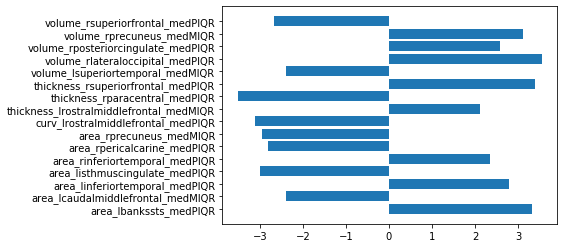

In [320]:
len(np.where(selected_rfe15.support_))
df_test.columns[np.where(selected_rfe15.support_)[0]],df_test.columns
plt.barh(y=df_test.columns[np.where(selected_rfe15.support_)[0]], width=selected_clc2.coef_[0])

In [284]:
# Load training dataset to train the current model using all training set
# clc15
Xtrain15 = np.load('./Final_Results/FS/Regular_minMaxNorm/Xtrain_svm.npy')

# clc610
Xtrain610 = np.load('./Final_Results/FS/Regular_minMaxNorm/Xtrain_corr_svm.npy')


# clc1115
Xtrain1115 = np.load('./Final_Results/FS/Regular_minMaxNorm/Xtrain_corr_l_svm.npy')

# clc1620
Xtrain1620 = np.load('./Final_Results/FS/Regular_minMaxNorm/Xtrain_corr_r_svm.npy')

ytrain = np.load('./Final_Results/FS/Regular_minMaxNorm/ytrain_corr.npy')


In [263]:
# clc1
print(classification_report(df_test['labels'].values, selected_clc1.predict(Xtest15)))

              precision    recall  f1-score   support

           0       0.70      0.58      0.64        36
           1       0.59      0.71      0.65        31

    accuracy                           0.64        67
   macro avg       0.65      0.65      0.64        67
weighted avg       0.65      0.64      0.64        67



In [264]:
# clc2
print(classification_report(df_test['labels'].values, selected_clc2.predict(Xtest15)))

              precision    recall  f1-score   support

           0       0.71      0.61      0.66        36
           1       0.61      0.71      0.66        31

    accuracy                           0.66        67
   macro avg       0.66      0.66      0.66        67
weighted avg       0.66      0.66      0.66        67



In [265]:
# clc3
print(classification_report(df_test['labels'].values, selected_clc3.predict(Xtest15)))

              precision    recall  f1-score   support

           0       0.67      0.56      0.61        36
           1       0.57      0.68      0.62        31

    accuracy                           0.61        67
   macro avg       0.62      0.62      0.61        67
weighted avg       0.62      0.61      0.61        67



In [266]:
# clc4
print(classification_report(df_test['labels'].values, selected_clc4.predict(Xtest15)))

              precision    recall  f1-score   support

           0       0.65      0.56      0.60        36
           1       0.56      0.65      0.60        31

    accuracy                           0.60        67
   macro avg       0.60      0.60      0.60        67
weighted avg       0.60      0.60      0.60        67



In [267]:
# clc5
print(classification_report(df_test['labels'].values, selected_clc5.predict(Xtest15)))

              precision    recall  f1-score   support

           0       0.66      0.58      0.62        36
           1       0.57      0.65      0.61        31

    accuracy                           0.61        67
   macro avg       0.61      0.61      0.61        67
weighted avg       0.62      0.61      0.61        67



In [268]:
# clc6
print(classification_report(df_test['labels'].values, selected_clc6.predict(Xtest610)))

              precision    recall  f1-score   support

           0       0.67      0.11      0.19        36
           1       0.48      0.94      0.63        31

    accuracy                           0.49        67
   macro avg       0.57      0.52      0.41        67
weighted avg       0.58      0.49      0.39        67



In [270]:
# clc7
print(classification_report(df_test['labels'].values, selected_clc7.predict(Xtest610)))

              precision    recall  f1-score   support

           0       0.60      0.08      0.15        36
           1       0.47      0.94      0.62        31

    accuracy                           0.48        67
   macro avg       0.53      0.51      0.38        67
weighted avg       0.54      0.48      0.37        67



In [271]:
# clc8
print(classification_report(df_test['labels'].values, selected_clc8.predict(Xtest610)))

              precision    recall  f1-score   support

           0       0.71      0.28      0.40        36
           1       0.51      0.87      0.64        31

    accuracy                           0.55        67
   macro avg       0.61      0.57      0.52        67
weighted avg       0.62      0.55      0.51        67



In [272]:
# clc9
print(classification_report(df_test['labels'].values, selected_clc9.predict(Xtest610)))

              precision    recall  f1-score   support

           0       0.67      0.11      0.19        36
           1       0.48      0.94      0.63        31

    accuracy                           0.49        67
   macro avg       0.57      0.52      0.41        67
weighted avg       0.58      0.49      0.39        67



In [273]:
# clc10
print(classification_report(df_test['labels'].values, selected_clc10.predict(Xtest610)))

              precision    recall  f1-score   support

           0       0.75      0.17      0.27        36
           1       0.49      0.94      0.64        31

    accuracy                           0.52        67
   macro avg       0.62      0.55      0.46        67
weighted avg       0.63      0.52      0.44        67



In [274]:
# clc11
print(classification_report(df_test['labels'].values, selected_clc11.predict(Xtest1115)))

              precision    recall  f1-score   support

           0       0.71      0.28      0.40        36
           1       0.51      0.87      0.64        31

    accuracy                           0.55        67
   macro avg       0.61      0.57      0.52        67
weighted avg       0.62      0.55      0.51        67



In [275]:
# clc12
print(classification_report(df_test['labels'].values, selected_clc12.predict(Xtest1115)))

              precision    recall  f1-score   support

           0       0.73      0.31      0.43        36
           1       0.52      0.87      0.65        31

    accuracy                           0.57        67
   macro avg       0.63      0.59      0.54        67
weighted avg       0.63      0.57      0.53        67



In [276]:
# clc13
print(classification_report(df_test['labels'].values, selected_clc13.predict(Xtest1115)))

              precision    recall  f1-score   support

           0       0.67      0.06      0.10        36
           1       0.47      0.97      0.63        31

    accuracy                           0.48        67
   macro avg       0.57      0.51      0.37        67
weighted avg       0.58      0.48      0.35        67



In [277]:
# clc14
print(classification_report(df_test['labels'].values, selected_clc14.predict(Xtest1115)))

              precision    recall  f1-score   support

           0       0.54      0.61      0.57        36
           1       0.46      0.39      0.42        31

    accuracy                           0.51        67
   macro avg       0.50      0.50      0.50        67
weighted avg       0.50      0.51      0.50        67



In [278]:
# clc15
print(classification_report(df_test['labels'].values, selected_clc15.predict(Xtest1115)))

              precision    recall  f1-score   support

           0       0.75      0.08      0.15        36
           1       0.48      0.97      0.64        31

    accuracy                           0.49        67
   macro avg       0.61      0.53      0.39        67
weighted avg       0.62      0.49      0.38        67



In [279]:
# clc16
print(classification_report(df_test['labels'].values, selected_clc16.predict(Xtest1620)))

              precision    recall  f1-score   support

           0       0.63      0.47      0.54        36
           1       0.53      0.68      0.59        31

    accuracy                           0.57        67
   macro avg       0.58      0.57      0.57        67
weighted avg       0.58      0.57      0.56        67



In [280]:
# clc17
print(classification_report(df_test['labels'].values, selected_clc17.predict(Xtest1620)))

              precision    recall  f1-score   support

           0       0.61      0.31      0.41        36
           1       0.49      0.77      0.60        31

    accuracy                           0.52        67
   macro avg       0.55      0.54      0.50        67
weighted avg       0.55      0.52      0.50        67



In [281]:
# clc18
print(classification_report(df_test['labels'].values, selected_clc18.predict(Xtest1620)))

              precision    recall  f1-score   support

           0       0.71      0.33      0.45        36
           1       0.52      0.84      0.64        31

    accuracy                           0.57        67
   macro avg       0.61      0.59      0.55        67
weighted avg       0.62      0.57      0.54        67



In [282]:
# clc19
print(classification_report(df_test['labels'].values, selected_clc19.predict(Xtest1620)))

              precision    recall  f1-score   support

           0       0.79      0.31      0.44        36
           1       0.53      0.90      0.67        31

    accuracy                           0.58        67
   macro avg       0.66      0.60      0.55        67
weighted avg       0.67      0.58      0.54        67



In [283]:
# clc20
print(classification_report(df_test['labels'].values, selected_clc20.predict(Xtest1620)))

              precision    recall  f1-score   support

           0       0.80      0.11      0.20        36
           1       0.48      0.97      0.65        31

    accuracy                           0.51        67
   macro avg       0.64      0.54      0.42        67
weighted avg       0.65      0.51      0.40        67



In [285]:
selected_clc1 = selected_clc1.fit(Xtrain15, ytrain)
selected_clc2 = selected_clc2.fit(Xtrain15, ytrain)
selected_clc3 = selected_clc3.fit(Xtrain15, ytrain)
selected_clc4 = selected_clc4.fit(Xtrain15, ytrain)
selected_clc5 = selected_clc5.fit(Xtrain15, ytrain)
selected_clc6 = selected_clc6.fit(Xtrain610, ytrain)
selected_clc7 = selected_clc7.fit(Xtrain610, ytrain)
selected_clc8 = selected_clc8.fit(Xtrain610, ytrain)
selected_clc9 = selected_clc9.fit(Xtrain610, ytrain)
selected_clc10 = selected_clc10.fit(Xtrain610, ytrain)
selected_clc11 = selected_clc11.fit(Xtrain1115, ytrain)
selected_clc12 = selected_clc12.fit(Xtrain1115, ytrain)
selected_clc13 = selected_clc13.fit(Xtrain1115, ytrain)
selected_clc14 = selected_clc14.fit(Xtrain1115, ytrain)
selected_clc15 = selected_clc15.fit(Xtrain1115, ytrain)
selected_clc16 = selected_clc16.fit(Xtrain1620, ytrain)
selected_clc17 = selected_clc17.fit(Xtrain1620, ytrain)
selected_clc18 = selected_clc18.fit(Xtrain1620, ytrain)
selected_clc19 = selected_clc19.fit(Xtrain1620, ytrain)
selected_clc20 = selected_clc20.fit(Xtrain1620, ytrain)

C:\ProgramData\Anaconda3\envs\untitled\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[17:03:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_bytree, gamma, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:03:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_bytree, gamma, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\envs\untitled\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[17:03:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_bytree, gamma, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\ProgramData\Anaconda3\envs\untitled\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


In [286]:
# clc1
print(classification_report(df_test['labels'].values, selected_clc1.predict(Xtest15)))

              precision    recall  f1-score   support

           0       0.70      0.58      0.64        36
           1       0.59      0.71      0.65        31

    accuracy                           0.64        67
   macro avg       0.65      0.65      0.64        67
weighted avg       0.65      0.64      0.64        67



In [287]:
# clc2
print(classification_report(df_test['labels'].values, selected_clc2.predict(Xtest15)))

              precision    recall  f1-score   support

           0       0.71      0.61      0.66        36
           1       0.61      0.71      0.66        31

    accuracy                           0.66        67
   macro avg       0.66      0.66      0.66        67
weighted avg       0.66      0.66      0.66        67



In [288]:
# clc3
print(classification_report(df_test['labels'].values, selected_clc3.predict(Xtest15)))

              precision    recall  f1-score   support

           0       0.66      0.53      0.58        36
           1       0.55      0.68      0.61        31

    accuracy                           0.60        67
   macro avg       0.60      0.60      0.60        67
weighted avg       0.61      0.60      0.60        67



In [289]:
# clc4
print(classification_report(df_test['labels'].values, selected_clc4.predict(Xtest15)))

              precision    recall  f1-score   support

           0       0.65      0.56      0.60        36
           1       0.56      0.65      0.60        31

    accuracy                           0.60        67
   macro avg       0.60      0.60      0.60        67
weighted avg       0.60      0.60      0.60        67



In [290]:
# clc5
print(classification_report(df_test['labels'].values, selected_clc5.predict(Xtest15)))

              precision    recall  f1-score   support

           0       0.69      0.50      0.58        36
           1       0.56      0.74      0.64        31

    accuracy                           0.61        67
   macro avg       0.63      0.62      0.61        67
weighted avg       0.63      0.61      0.61        67



In [292]:
# clc6
print(classification_report(df_test['labels'].values, selected_clc6.predict(Xtest610)))

              precision    recall  f1-score   support

           0       0.67      0.11      0.19        36
           1       0.48      0.94      0.63        31

    accuracy                           0.49        67
   macro avg       0.57      0.52      0.41        67
weighted avg       0.58      0.49      0.39        67



In [293]:
# clc7
print(classification_report(df_test['labels'].values, selected_clc7.predict(Xtest610)))

              precision    recall  f1-score   support

           0       0.60      0.08      0.15        36
           1       0.47      0.94      0.62        31

    accuracy                           0.48        67
   macro avg       0.53      0.51      0.38        67
weighted avg       0.54      0.48      0.37        67



In [294]:
# clc8
print(classification_report(df_test['labels'].values, selected_clc8.predict(Xtest610)))

              precision    recall  f1-score   support

           0       0.64      0.58      0.61        36
           1       0.56      0.61      0.58        31

    accuracy                           0.60        67
   macro avg       0.60      0.60      0.60        67
weighted avg       0.60      0.60      0.60        67



In [295]:
# clc9
print(classification_report(df_test['labels'].values, selected_clc9.predict(Xtest610)))

              precision    recall  f1-score   support

           0       0.67      0.11      0.19        36
           1       0.48      0.94      0.63        31

    accuracy                           0.49        67
   macro avg       0.57      0.52      0.41        67
weighted avg       0.58      0.49      0.39        67



In [296]:
# clc10
print(classification_report(df_test['labels'].values, selected_clc10.predict(Xtest610)))

              precision    recall  f1-score   support

           0       0.67      0.11      0.19        36
           1       0.48      0.94      0.63        31

    accuracy                           0.49        67
   macro avg       0.57      0.52      0.41        67
weighted avg       0.58      0.49      0.39        67



In [297]:
# clc11
print(classification_report(df_test['labels'].values, selected_clc11.predict(Xtest1115)))

              precision    recall  f1-score   support

           0       0.71      0.28      0.40        36
           1       0.51      0.87      0.64        31

    accuracy                           0.55        67
   macro avg       0.61      0.57      0.52        67
weighted avg       0.62      0.55      0.51        67



In [298]:
# clc12
print(classification_report(df_test['labels'].values, selected_clc12.predict(Xtest1115)))

              precision    recall  f1-score   support

           0       0.73      0.31      0.43        36
           1       0.52      0.87      0.65        31

    accuracy                           0.57        67
   macro avg       0.63      0.59      0.54        67
weighted avg       0.63      0.57      0.53        67



In [299]:
# clc13
print(classification_report(df_test['labels'].values, selected_clc13.predict(Xtest1115)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.46      1.00      0.63        31

    accuracy                           0.46        67
   macro avg       0.23      0.50      0.32        67
weighted avg       0.21      0.46      0.29        67



C:\ProgramData\Anaconda3\envs\untitled\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [300]:
# clc14
print(classification_report(df_test['labels'].values, selected_clc14.predict(Xtest1115)))

              precision    recall  f1-score   support

           0       0.54      0.61      0.57        36
           1       0.46      0.39      0.42        31

    accuracy                           0.51        67
   macro avg       0.50      0.50      0.50        67
weighted avg       0.50      0.51      0.50        67



In [301]:
# clc15
print(classification_report(df_test['labels'].values, selected_clc15.predict(Xtest1115)))

              precision    recall  f1-score   support

           0       1.00      0.03      0.05        36
           1       0.47      1.00      0.64        31

    accuracy                           0.48        67
   macro avg       0.73      0.51      0.35        67
weighted avg       0.75      0.48      0.32        67



In [302]:
# clc16
print(classification_report(df_test['labels'].values, selected_clc16.predict(Xtest1620)))

              precision    recall  f1-score   support

           0       0.63      0.47      0.54        36
           1       0.53      0.68      0.59        31

    accuracy                           0.57        67
   macro avg       0.58      0.57      0.57        67
weighted avg       0.58      0.57      0.56        67



In [303]:
# clc17
print(classification_report(df_test['labels'].values, selected_clc17.predict(Xtest1620)))

              precision    recall  f1-score   support

           0       0.61      0.31      0.41        36
           1       0.49      0.77      0.60        31

    accuracy                           0.52        67
   macro avg       0.55      0.54      0.50        67
weighted avg       0.55      0.52      0.50        67



In [304]:
# clc18
print(classification_report(df_test['labels'].values, selected_clc18.predict(Xtest1620)))

              precision    recall  f1-score   support

           0       0.50      0.17      0.25        36
           1       0.45      0.81      0.58        31

    accuracy                           0.46        67
   macro avg       0.48      0.49      0.42        67
weighted avg       0.48      0.46      0.40        67



In [305]:
# clc19
print(classification_report(df_test['labels'].values, selected_clc19.predict(Xtest1620)))

              precision    recall  f1-score   support

           0       0.79      0.31      0.44        36
           1       0.53      0.90      0.67        31

    accuracy                           0.58        67
   macro avg       0.66      0.60      0.55        67
weighted avg       0.67      0.58      0.54        67



In [306]:
# clc20
print(classification_report(df_test['labels'].values, selected_clc20.predict(Xtest1620)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.46      1.00      0.63        31

    accuracy                           0.46        67
   macro avg       0.23      0.50      0.32        67
weighted avg       0.21      0.46      0.29        67



C:\ProgramData\Anaconda3\envs\untitled\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### RF


In [307]:
clf = load('./Final_Results/ML/minmaxreg/clf__rf_train.joblib')
clf_corr = load('./Final_Results/ML/minmaxreg/clf__rf_train_corr.joblib')
clf_corr_l = load('./Final_Results/ML/minmaxreg/clf__rf_train_corr_l.joblib')
clf_corr_r = load('./Final_Results/ML/minmaxreg/clf__rf_train_corr_r.joblib')

FileNotFoundError: [Errno 2] No such file or directory: './Final_Results/ML/minmaxreg/clf__rf_train_corr.joblib'

In [110]:
print("clf__rf_train")
print(clf['lSVM'].best_score_)
print(clf['pagg'].best_score_)
print(clf['lg'].best_score_)
print(clf['XGB'].best_score_)
print(clf['GNB'].best_score_)
print(clf['SVC'].best_score_)
print(clf['Rf'].best_score_)
print(clf['nn'].best_score_)
print("0000000000000000000000000000000000000000000")
print("clf__rf_train_corr")
print(clf_corr['lSVM'].best_score_)
print(clf_corr['pagg'].best_score_)
print(clf_corr['lg'].best_score_)
print(clf_corr['XGB'].best_score_)
print(clf_corr['GNB'].best_score_)
print(clf_corr['SVC'].best_score_)
print(clf_corr['Rf'].best_score_)
print(clf_corr['nn'].best_score_)
print("0000000000000000000000000000000000000000000")
print("clf__rf_train_corr_l")
print(clf_corr_l['lSVM'].best_score_)
print(clf_corr_l['pagg'].best_score_)
print(clf_corr_l['lg'].best_score_)
print(clf_corr_l['XGB'].best_score_)
print(clf_corr_l['GNB'].best_score_)
print(clf_corr_l['SVC'].best_score_)
print(clf_corr_l['Rf'].best_score_)
print(clf_corr_l['nn'].best_score_)
print("0000000000000000000000000000000000000000000")
print("clf__rf_train_corr_r")
print(clf_corr_r['lSVM'].best_score_)
print(clf_corr_r['pagg'].best_score_)
print(clf_corr_r['lg'].best_score_)
print(clf_corr_r['XGB'].best_score_)
print(clf_corr_r['GNB'].best_score_)
print(clf_corr_r['SVC'].best_score_)
print(clf_corr_r['Rf'].best_score_)
print(clf_corr_r['nn'].best_score_)

clf__rf_train
0.5964124293785311
0.5017514124293785
0.5947175141242939
0.5879943502824859
0.5203389830508474
0.5965254237288135
0.5393220338983051
0.5536440677966101
0000000000000000000000000000000000000000000
clf__rf_train_corr
0.5877966101694916
0.5572033898305084
0.609774011299435
0.5811864406779661
0.5352824858757061
0.606186440677966
0.5626553672316386
0.5925423728813559
0000000000000000000000000000000000000000000
clf__rf_train_corr_l
0.5642655367231638
0.5248870056497175
0.567683615819209
0.5876836158192089
0.5503954802259887
0.599180790960452
0.5592655367231638
0.5877683615819208
0000000000000000000000000000000000000000000
clf__rf_train_corr_r
0.5796045197740114
0.532768361581921
0.5881073446327683
0.5964971751412429
0.5287005649717513
0.5947175141242939
0.5727401129943503
0.5846610169491526


In [111]:
selected_clc1 = clf_corr['lg'].best_estimator_
selected_clc2 = clf_corr['SVC'].best_estimator_
print(f"selected classifier 1: lg_corr with accuracy {clf_corr['lg'].best_score_}")
print(f"selected classifier 2: SVC_corr with accuracy {clf_corr['SVC'].best_score_}")


selected classifier 1: lg_corr with accuracy 0.609774011299435
selected classifier 2: SVC_corr with accuracy 0.606186440677966


In [112]:
# Load test dataset
df_test = pd.read_csv('./Final_Results/INITIAL_SPLIT/test_fullbrain.csv', index_col=0)
print(df_test.shape)
print(df_test['labels'].value_counts())

print('baseline score: ',36/(31+36))
XN = mynormalize(df_test, allfeats=False)

# Load the corresponding rfe object
#clc1,2
selected_rfe1 = load('./Final_Results/FS/Normalize_allMorphFeats/rfetrain_corr_rf.joblib')
Xtest1 = XN[:, np.where(selected_rfe1.support_)[0]]



(67, 545)
0    36
1    31
Name: labels, dtype: int64
baseline score:  0.5373134328358209


In [113]:
# Load training dataset to train the current model using all training set
# clc1
Xtrain1 = np.load('./Final_Results/FS/Normalize_allMorphFeats/Xtrain_corr_rf.npy')
ytrain = np.load('./Final_Results/FS/Normalize_allMorphFeats/ytrain_corr.npy')


In [114]:
# clc1
print(classification_report(df_test['labels'].values, selected_clc1.predict(Xtest1)))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70        36
           1       0.00      0.00      0.00        31

    accuracy                           0.54        67
   macro avg       0.27      0.50      0.35        67
weighted avg       0.29      0.54      0.38        67



C:\ProgramData\Anaconda3\envs\untitled\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
# clc2
print(classification_report(df_test['labels'].values, selected_clc2.predict(Xtest1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.46      1.00      0.63        31

    accuracy                           0.46        67
   macro avg       0.23      0.50      0.32        67
weighted avg       0.21      0.46      0.29        67



C:\ProgramData\Anaconda3\envs\untitled\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [117]:
selected_clc1 = selected_clc1.fit(Xtrain1, ytrain)
selected_clc2 = selected_clc2.fit(Xtrain1, ytrain)


C:\ProgramData\Anaconda3\envs\untitled\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\ProgramData\Anaconda3\envs\untitled\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [118]:
# clc1
print(classification_report(df_test['labels'].values, selected_clc1.predict(Xtest1)))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70        36
           1       0.00      0.00      0.00        31

    accuracy                           0.54        67
   macro avg       0.27      0.50      0.35        67
weighted avg       0.29      0.54      0.38        67



C:\ProgramData\Anaconda3\envs\untitled\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [120]:
# clc2
print(classification_report(df_test['labels'].values, selected_clc2.predict(Xtest1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.46      1.00      0.63        31

    accuracy                           0.46        67
   macro avg       0.23      0.50      0.32        67
weighted avg       0.21      0.46      0.29        67



C:\ProgramData\Anaconda3\envs\untitled\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
